<a href="https://colab.research.google.com/github/easyforitall/Google_Gemini_API_Model/blob/main/Google_Gemini_API_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Setting up the developing environment and API access to use gemini.
2. Generate text responses from text inputs.
3. Generate text responses from multimodal inputs(text and images)
4. Use Gemini for multi-turn conversations(chat)
5. Use embeddings for large language models

In [1]:
# Installing python SDK for google gemini api as it contained google-generative package
!pip install -q -U google-generativeai

In [2]:
# installing necessary packages
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace(".", "*")
  return Markdown(textwrap.indent(text, '>', predicate=lambda _: True))

In [3]:
# Used to securely store your API Key so for importing from google colab we are importing userdata
from google.colab import userdata

SETTING UP THE API KEY FROM GOOGLE COLAB KEY FOLDER

In [4]:
GOOGLE_API_KEY = userdata.get('Google_Gemini_API')
genai.configure(api_key=GOOGLE_API_KEY)

In [8]:
print(genai.list_models)

<function list_models at 0x7d86f1f342c0>


LIST MODELS
1. We can use list_models to see the available gemini models
2. gemini-pro : optimized for text-only prompts
3. gemini-pro-vision : optimized for text and image prompts

In [13]:
li1 = []
for m in genai.list_models():
  li1.append(m.name)
print(len(li1))
  # print(m.name)

55


In [15]:
# li = []
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
#     li.append(m.name)
# print(len(li))
    print(m.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash-preview-04-17-thinking
models/gemini-2.5-pro-preview-05-06
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-fl

GENERATE TEXT FROM TEXT INPUTS

In [18]:
# calling the model
model = genai.GenerativeModel('gemini-1.5-flash')
model

genai.GenerativeModel(
    model_name='models/gemini-1.5-flash',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [19]:
%%time
response = model.generate_content('What is the meaning of life?')

CPU times: user 65 ms, sys: 4.04 ms, total: 69.1 ms
Wall time: 3.56 s


In [20]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "There's no single, universally accepted answer to the meaning of life.  It's a question that has been pondered by philosophers, theologians, and individuals for centuries.  The meaning is often considered to be subjective and personal, shaped by individual beliefs, experiences, and values.\n\nSome common perspectives include:\n\n* **Nihilism:** The belief that life is inherently without meaning or purpose.\n* **Existentialism:** The belief that individuals create their own meaning and purpose through their choices and actions.\n* **Absurdism:** The belief that the search for meaning in a meaningless universe is inherently absurd, but that embracing this absurdity is key to finding fulfillment.\n* **Spiritual or Religious Beliefs:** Many religions offer answe

In [21]:
response.text

"There's no single, universally accepted answer to the meaning of life.  It's a question that has been pondered by philosophers, theologians, and individuals for centuries.  The meaning is often considered to be subjective and personal, shaped by individual beliefs, experiences, and values.\n\nSome common perspectives include:\n\n* **Nihilism:** The belief that life is inherently without meaning or purpose.\n* **Existentialism:** The belief that individuals create their own meaning and purpose through their choices and actions.\n* **Absurdism:** The belief that the search for meaning in a meaningless universe is inherently absurd, but that embracing this absurdity is key to finding fulfillment.\n* **Spiritual or Religious Beliefs:** Many religions offer answers about the meaning of life, often involving serving a higher power, following divine commandments, or achieving enlightenment or salvation.\n* **Hedonism:**  The belief that pleasure and happiness are the ultimate goals in life.\

In [22]:
response.candidates

[content {
  parts {
    text: "There\'s no single, universally accepted answer to the meaning of life.  It\'s a question that has been pondered by philosophers, theologians, and individuals for centuries.  The meaning is often considered to be subjective and personal, shaped by individual beliefs, experiences, and values.\n\nSome common perspectives include:\n\n* **Nihilism:** The belief that life is inherently without meaning or purpose.\n* **Existentialism:** The belief that individuals create their own meaning and purpose through their choices and actions.\n* **Absurdism:** The belief that the search for meaning in a meaningless universe is inherently absurd, but that embracing this absurdity is key to finding fulfillment.\n* **Spiritual or Religious Beliefs:** Many religions offer answers about the meaning of life, often involving serving a higher power, following divine commandments, or achieving enlightenment or salvation.\n* **Hedonism:**  The belief that pleasure and happiness

In [24]:
to_markdown(response.text)

>There's no single, universally accepted answer to the meaning of life*  It's a question that has been pondered by philosophers, theologians, and individuals for centuries*  The meaning is often considered to be subjective and personal, shaped by individual beliefs, experiences, and values*
>
>Some common perspectives include:
>
>* **Nihilism:** The belief that life is inherently without meaning or purpose*
>* **Existentialism:** The belief that individuals create their own meaning and purpose through their choices and actions*
>* **Absurdism:** The belief that the search for meaning in a meaningless universe is inherently absurd, but that embracing this absurdity is key to finding fulfillment*
>* **Spiritual or Religious Beliefs:** Many religions offer answers about the meaning of life, often involving serving a higher power, following divine commandments, or achieving enlightenment or salvation*
>* **Hedonism:**  The belief that pleasure and happiness are the ultimate goals in life*
>* **Purpose-driven life:** Finding meaning through contributing to something larger than oneself, such as a cause, community, or family*
>
>Ultimately, the meaning of life is what you make it* It's a question to be explored and answered personally, rather than solved definitively*


If the API failed to return a result, USE GenarateContentResponse.prompt_feedback to see if it was blocked due to safety concerns regarding the prompt

In [25]:
response.prompt_feedback # API was successful

By default the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated

In [26]:
%%time
response = model.generate_content('What is the meaning of life?', stream=True)

CPU times: user 81.9 ms, sys: 10.2 ms, total: 92.1 ms
Wall time: 4.65 s


In [27]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

There
________________________________________________________________________________
's no single, universally accepted answer to the meaning of life.  The
________________________________________________________________________________
 meaning of life is a deeply personal and philosophical question that has been pondered by humans
________________________________________________________________________________
 for millennia.  Different people find meaning in different things, including:

* **Relationships:**  Love, connection, and belonging with family, friends, and
________________________________________________________________________________
 community.
* **Contribution:** Making a positive impact on the world, helping others, and leaving a legacy.
* **Creativity:**  Expressing oneself
________________________________________________________________________________
 through art, music, writing, or other creative pursuits.
* **Growth:** Learning, developing, and expanding one's

GENERATE TEXT FROM IMAGE AND TEXT INPUTS - gemini-pro-vision

In [30]:
# To load the image use the below command
!curl -o image1.jpg https://img.freepik.com/free-psd/vibrant-vegetable-harvest-colorful-collection-fresh-produce_191095-79960.jpg?semt=ais_hybrid&w=740

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  127k  100  127k    0     0  89976      0  0:00:01  0:00:01 --:--:-- 90020


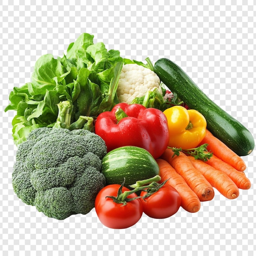

In [33]:
import PIL.Image
img = PIL.Image.open('image1.jpg')
img
resized_image = img.resize((256,256))
# resized_image.show()
display(resized_image)

In [35]:
# loading the model
model2 = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(resized_image)
response.text

"That's a nice, colorful picture of a variety of fresh vegetables!  It includes:\n\n* **Broccoli:** A dark green cruciferous vegetable.\n* **Cauliflower:** A white cruciferous vegetable.\n* **Lettuce:**  Likely a mix of green leaf lettuces.\n* **Red Bell Pepper:** A sweet pepper with a vibrant red color.\n* **Yellow Bell Pepper:** A sweet pepper with a bright yellow color.\n* **Zucchini:** A summer squash, typically green.\n* **Carrots:**  Orange root vegetables.\n* **Tomatoes:** Red, round tomatoes on the vine.\n* **Possibly a small Watermelon or cantaloupe:**  The green, round vegetable in the middle might be a small version of one of these, though it is hard to say for certain from the image.\n\n\nThe image showcases a healthy and diverse selection of vegetables.\n"

In [37]:
to_markdown(response.text)

>That's a nice, colorful picture of a variety of fresh vegetables!  It includes:
>
>* **Broccoli:** A dark green cruciferous vegetable*
>* **Cauliflower:** A white cruciferous vegetable*
>* **Lettuce:**  Likely a mix of green leaf lettuces*
>* **Red Bell Pepper:** A sweet pepper with a vibrant red color*
>* **Yellow Bell Pepper:** A sweet pepper with a bright yellow color*
>* **Zucchini:** A summer squash, typically green*
>* **Carrots:**  Orange root vegetables*
>* **Tomatoes:** Red, round tomatoes on the vine*
>* **Possibly a small Watermelon or cantaloupe:**  The green, round vegetable in the middle might be a small version of one of these, though it is hard to say for certain from the image*
>
>
>The image showcases a healthy and diverse selection of vegetables*


GIVING AN INPUT AND IMAGE TO WRITE A BLOG

In [41]:
response2 = model.generate_content(["Write a short, engaging blog post based on this picture by describing it.", resized_image], stream=True)
response2.resolve()

In [42]:
to_markdown(response2.text)

>## Rainbow on Your Plate: A Vibrant Veggie Fiesta!
>
>Feast your eyes on this!  This isn't just a pile of vegetables; it's a vibrant explosion of color and flavor*  From the deep green of broccoli and the crisp lettuce to the sunny yellow of the bell pepper and the fiery red of the tomatoes, this picture screams healthy eating*
>
>Imagine the possibilities!  Think crunchy salads bursting with freshness, hearty stir-fries packed with nutrients, or a zesty veggie curry brimming with goodness*  This colourful collection is a testament to the incredible variety nature offers*
>
>This isn't just about looking good; it's about feeling great*  Each vegetable boasts its own unique set of vitamins and minerals, contributing to a healthy and balanced diet*  So ditch the processed foods, grab a handful of these beauties, and experience the joy of vibrant, wholesome eating*  Your body will thank you for it!
>
>What's your favorite way to enjoy these colourful veggies?  Share your recipes in the comments below!
